In [81]:
import numpy as np
from tensorflow import keras

print('keras version:', keras.__version__)
print('keras backend:', keras.backend.backend())

keras version: 2.2.4-tf
keras backend: tensorflow


In [82]:
#load data
data = keras.datasets.mnist
#data = keras.datasets.fashion_mnist

In [83]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [84]:
print('train shape:', x_train.shape)
print('train y:', y_train.shape)
print('test_shape:', x_test.shape)
print('test y:', y_test.shape)

num_labels = len(np.unique(y_train))
image_size = x_train.shape[1]
input_shape = image_size * image_size

print('num of labels:', num_labels)
print('image size:', image_size)
print('input shape:', input_shape)



train shape: (60000, 28, 28)
train y: (60000,)
test_shape: (10000, 28, 28)
test y: (10000,)
num of labels: 10
image size: 28
input shape: 784


In [85]:
#reshape to flat 784 

x_train2 = x_train.reshape( x_train.shape[0] , input_shape)
x_train2 = x_train2.astype('float32') / 255

x_test2 = x_test.reshape(x_test.shape[0],input_shape)
x_test2 = x_test2.astype('float32') / 255

#hot encode
y_train2 = keras.utils.to_categorical(y_train)
y_test2 = keras.utils.to_categorical(y_test)

In [86]:
print("revised x_train shape:", x_train2.shape)
print('revised y_train shape:', y_train2.shape)
print('revised x_test shape:', x_test2.shape)
print('revised y_test shape:', y_test2.shape)

revised x_train shape: (60000, 784)
revised y_train shape: (60000, 10)
revised x_test shape: (10000, 784)
revised y_test shape: (10000, 10)


In [87]:
num_hidden_layers = 512
epochs=10
batch_size=256

In [88]:
#model
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(num_hidden_layers, input_shape=(input_shape,), activation='relu'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [89]:
#train the model with train data
fit_history = model.fit(x_train2, y_train2,
  epochs=epochs ,
  batch_size=batch_size,
  validation_data=(x_test2,y_test2)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3236 - acc: 0.9100 - val_loss: 0.1580 - val_acc: 0.9568
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1349 - acc: 0.9616 - val_loss: 0.1110 - val_acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0900 - acc: 0.9737 - val_loss: 0.0831 - val_acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0655 - acc: 0.9815 - val_loss: 0.0811 - val_acc: 0.9752
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0499 - acc: 0.9859 - val_loss: 0.0683 - val_acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0383 - acc: 0.9895 - val_loss: 0.0690 - val_acc: 0.9785
Epoch 7/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0292 - acc: 0.9925 - val_loss: 0.

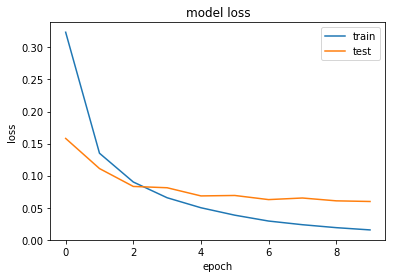

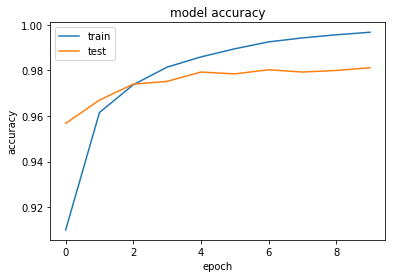

In [90]:
%matplotlib inline
from matplotlib import pyplot as plt

# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()